In [4]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy import stats as stats
from skimage import feature
from skimage.feature import greycoprops,greycomatrix
import os
import skimage.measure
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Activation
from keras import layers
import tensorflow as tf

In [5]:
def feature_extractor(dataset):
    rowsList=[]
    for image in range(dataset.shape[0]):
        rows=[]
        img = dataset[image]  
        coeffs=pywt.wavedec(img, 'db1',level=1)
        cA=coeffs[0]
        cA = cA / cA.max()
        cA = 255 * cA 
        cA=cA.astype(np.uint8)
#         for angs in angles:
        g=greycomatrix(cA,[1],[0],normed=True)
#             temp=[np.mean(greycoprops(g, 'contrast')),np.mean(greycoprops(g, 'dissimilarity')),np.mean(greycoprops(g, 'correlation'))]
        temp=[np.mean(greycoprops(g, 'energy')),skimage.measure.shannon_entropy(g),np.mean(greycoprops(g, 'contrast')),np.mean(greycoprops(g, 'dissimilarity')),np.mean(greycoprops(g, 'homogeneity')),np.mean(greycoprops(g, 'correlation')),np.mean(greycoprops(g, 'ASM'))]
        rows.append(temp)
        rowsList.append(rows)
    return np.array(rowsList)

In [6]:
pickle_in = open("X_train","rb")
X_train = feature_extractor(pickle.load(pickle_in))
pickle_in = open("y_train","rb")
y_train = pickle.load(pickle_in)

In [7]:
pickle_in = open("X_test","rb")
X_test = feature_extractor(pickle.load(pickle_in))
pickle_in = open("y_test","rb")
y_test = pickle.load(pickle_in)

In [8]:
X_train = X_train.reshape(-1,1,7, 1)
X_test = X_test.reshape(-1,1,7, 1)

In [23]:
model = Sequential()
model.add(layers.Conv2D(32, (1,1), activation='relu', input_shape=(1,7,1),))
model.add(layers.MaxPooling2D((1,1)))
model.add(layers.Conv2D(64, (1,1), activation='relu'))
model.add(layers.MaxPooling2D((1,1)))
model.add(layers.Conv2D(64, (1,1), activation='relu'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 1, 7, 32)          64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 7, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 7, 64)          2112      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 7, 64)          4160      
Total params: 6,336
Trainable params: 6,336
Non-trainable params: 0
_________________________________________________________________


In [24]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# callback = MyThresholdCallback(threshold=0.8)
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
1/1 [==============================] - 1s 897ms/step - loss: 10.9464 - accuracy: 0.3333 - val_loss: 3.5002 - val_accuracy: 0.6667
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 2.0275 - accuracy: 0.4333 - val_loss: 17.7949 - val_accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 19.7099 - accuracy: 0.3333 - val_loss: 15.9197 - val_accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 19.8130 - accuracy: 0.3333 - val_loss: 6.5175 - val_accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 55ms/step - loss: 8.8320 - accuracy: 0.3333 - val_loss: 3.7031 - val_accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 3.9071 - accuracy: 0.3333 - val_loss: 8.4395 - val_accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 58ms/step - loss: 7.4088 - accuracy: 0.3333 - val_loss: 11.4443 - val_accuracy: 0.3333
Epoch 8/100
1

1/1 [==============================] - 0s 41ms/step - loss: 0.6735 - accuracy: 0.7333 - val_loss: 0.7747 - val_accuracy: 0.7500
Epoch 60/100
1/1 [==============================] - 0s 43ms/step - loss: 0.6947 - accuracy: 0.6667 - val_loss: 0.8157 - val_accuracy: 0.5833
Epoch 61/100
1/1 [==============================] - 0s 39ms/step - loss: 0.7247 - accuracy: 0.6000 - val_loss: 0.8238 - val_accuracy: 0.6667
Epoch 62/100
1/1 [==============================] - 0s 43ms/step - loss: 0.7203 - accuracy: 0.6000 - val_loss: 0.8071 - val_accuracy: 0.7500
Epoch 63/100
1/1 [==============================] - 0s 52ms/step - loss: 0.6917 - accuracy: 0.6000 - val_loss: 0.8011 - val_accuracy: 0.8333
Epoch 64/100
1/1 [==============================] - 0s 46ms/step - loss: 0.6725 - accuracy: 0.6667 - val_loss: 0.8023 - val_accuracy: 0.8333
Epoch 65/100
1/1 [==============================] - 0s 45ms/step - loss: 0.6732 - accuracy: 0.7333 - val_loss: 0.7916 - val_accuracy: 0.8333
Epoch 66/100
1/1 [========

In [11]:
model.save('model.h5')

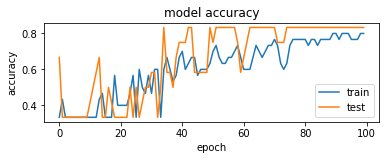

In [25]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')